<a href="https://colab.research.google.com/github/Chzacher/ENSYS5800-AI-Energy-zacher.c/blob/main/ProjectR8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#####===> DO NOT CHANGE THIS CELL <===#####
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()                # Import the seaborn plotting package

###########################################

# **Data Import and Manipulation**

In [43]:
url = 'https://raw.githubusercontent.com/Chzacher/ENSYS5800-AI-Energy-zacher.c/main/oedi_data.csv'
df0 = pd.read_csv(url)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51504 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   randid                    51504 non-null  object 
 1   Date                      51504 non-null  object 
 2   NOAAClimRegion            51504 non-null  object 
 3   TempZone                  51504 non-null  object 
 4   HumidZone                 51504 non-null  object 
 5   bin_PlantSize_kW          51504 non-null  object 
 6   plant_age_months          51356 non-null  float64
 7   active_snow_tickets       51504 non-null  object 
 8   snow_bin_ticket_minutes   51504 non-null  object 
 9   snow_affected_assets      51504 non-null  object 
 10  snow_production_level     51437 non-null  object 
 11  PR                        49940 non-null  float64
 12  snow_value_mm             45682 non-null  float64
 13  total_daily_snow_mm       45327 non-null  float64
 14  low_ir

In [ ]:
df1 = df0.dropna()
df1['active_snow_tickets'] = pd.Series(np.where(df1.active_snow_tickets.values == 'yes', 1, 0), df1.index)
df1['active_snow_tickets']= df1['active_snow_tickets'].astype(int)
df1['storm_active_tickets'] = pd.Series(np.where(df1.storm_active_tickets.values == 'yes', 1, 0), df1.index)
df1['storm_active_tickets']= df1['storm_active_tickets'].astype(int)
df1['Date']= pd.to_datetime(df1['Date'])
df1.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33738 entries, 0 to 51503
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   randid                    33738 non-null  object        
 1   Date                      33738 non-null  datetime64[ns]
 2   NOAAClimRegion            33738 non-null  object        
 3   TempZone                  33738 non-null  object        
 4   HumidZone                 33738 non-null  object        
 5   bin_PlantSize_kW          33738 non-null  object        
 6   plant_age_months          33738 non-null  float64       
 7   active_snow_tickets       33738 non-null  int64         
 8   snow_bin_ticket_minutes   33738 non-null  object        
 9   snow_affected_assets      33738 non-null  object        
 10  snow_production_level     33738 non-null  object        
 11  PR                        33738 non-null  float64       
 12  snow_value_mm     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,33738.000000,33738.0,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.000000,33738.0,33738.000000,33738.000000,33738.00000,33738.000000,33738.000000,33738.000000,33738.000000,33738.00000
mean,44.591499,0.0,0.679559,0.590467,1.490023,0.234780,99.023436,0.008507,320.042593,2.185277,17.208163,0.0,0.000119,0.004327,0.51479,1419.180835,0.001215,0.213557,1542.179738,0.26276
std,22.024962,0.0,0.255210,7.125497,12.210168,0.423867,394.980113,0.091840,87.817508,8.280302,30.005765,0.0,0.010888,0.065642,22.06232,1069.611552,0.034840,7.071819,889.577994,0.44014
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,29.000000,0.0,0.701644,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,175.000000,0.000000,0.000000,629.000000,0.00000
50%,45.000000,0.0,0.761219,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.000000,4.000000,0.0,0.000000,0.000000,0.00000,2420.000000,0.000000,0.000000,2255.000000,0.00000
75%,57.000000,0.0,0.810292,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.030112,20.000000,0.0,0.000000,0.000000,0.00000,2420.000000,0.000000,0.000000,2255.000000,1.00000
max,123.000000,0.0,1.199583,263.616900,284.713242,1.000000,3614.551523,1.000000,354.000000,278.525241,169.000000,0.0,1.000000,1.000000,1440.00000,2420.000000,1.000000,496.000000,2255.000000,1.00000


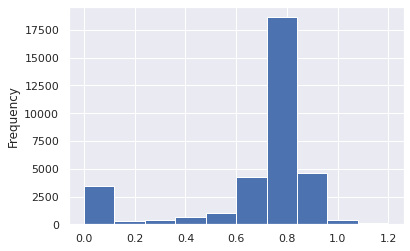

In [ ]:
df1['PR'].plot(kind="hist")

Due to the poor modeling seen so far. I will be looking at the precipitation effect on the performance of the PV units when they were functioning within a more typical band. Specifically we will reduce our data set so that 0< PR >1

In [ ]:
df1 = df1[df1.PR < 1]
df1 = df1[df1.PR > 0]

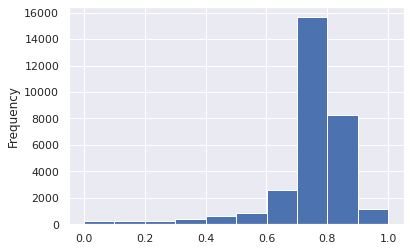

In [ ]:
df1['PR'].plot(kind="hist")

In [ ]:
df1.PR.describe()

count    30267.000000
mean         0.746147
std          0.135277
min          0.000751
25%          0.726579
50%          0.767836
75%          0.814949
max          0.999943
Name: PR, dtype: float64

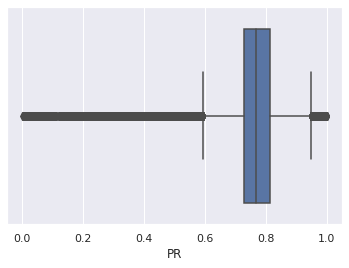

In [ ]:
sns.boxplot(x=df1['PR'])                              

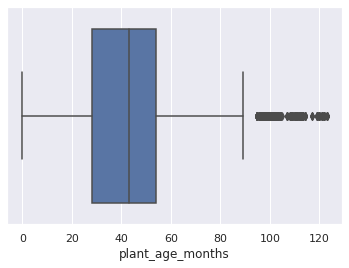

In [ ]:
sns.boxplot(x=df1['plant_age_months'])

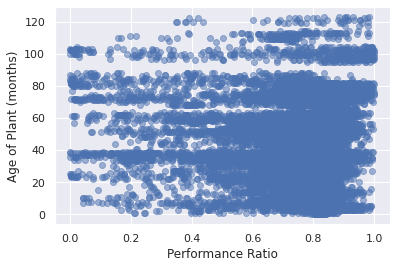

In [ ]:
plt.scatter(df1['PR'], df1['plant_age_months'], alpha=0.5)
plt.xlabel('Performance Ratio')
plt.ylabel('Age of Plant (months)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f3f58ef1f90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


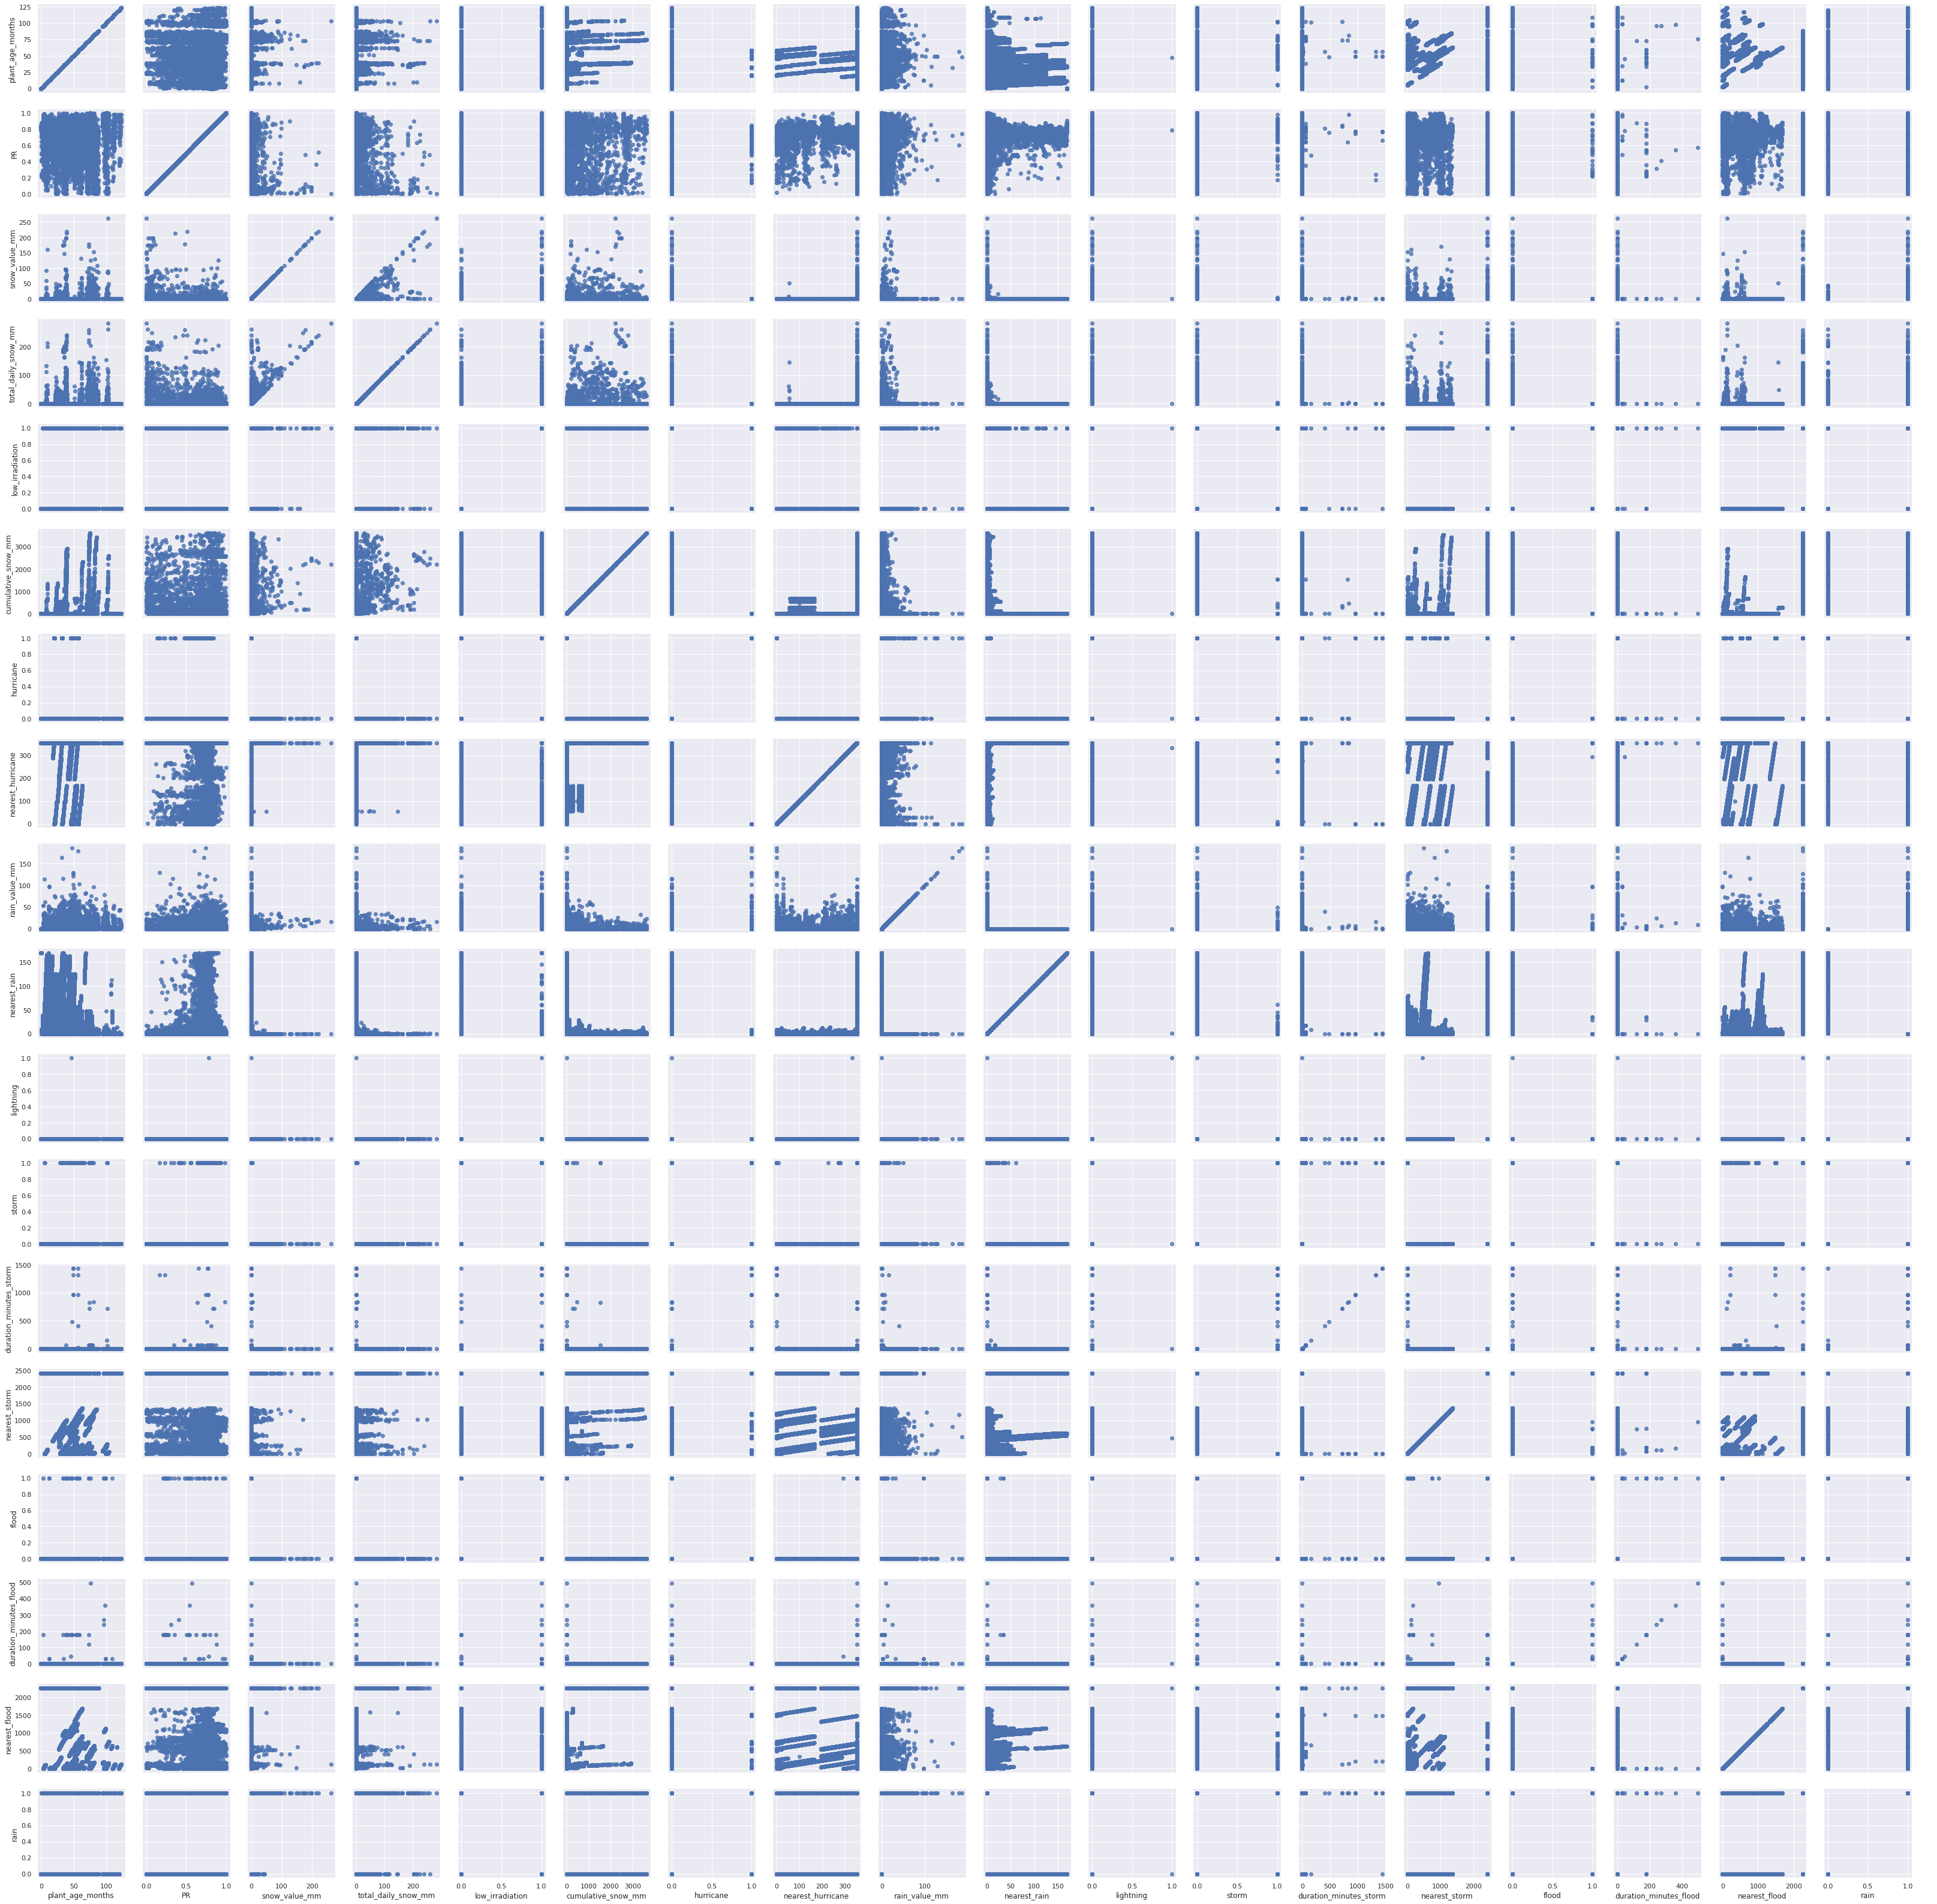

In [ ]:
g = sns.PairGrid(df1, vars=['plant_age_months',	'PR',	'snow_value_mm',	'total_daily_snow_mm',	'low_irradiation',	'cumulative_snow_mm',	'hurricane',	'nearest_hurricane',	'rain_value_mm',	'nearest_rain',	'lightning',	'storm',	'duration_minutes_storm',	'nearest_storm',	'flood',	'duration_minutes_flood',	'nearest_flood',	'rain'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

In [ ]:
corr_mat = df1.corr().stack().reset_index(name="correlation")
corr_mat[corr_mat['level_0']=='PR']

,level_0,level_1,correlation
18,PR,plant_age_months,-0.056367
19,PR,PR,1.000000
20,PR,snow_value_mm,-0.240337
21,PR,total_daily_snow_mm,-0.320045
22,PR,low_irradiation,-0.195067
23,PR,cumulative_snow_mm,-0.182769
24,PR,hurricane,-0.034924
25,PR,nearest_hurricane,0.061569
26,PR,rain_value_mm,-0.075306
27,PR,nearest_rain,-0.002978


Strongest correlations to PR:

Negative: total_daily_snow_mm, snow_value_mm, low_irradiation, rain_value_mm

Positive: nearest_storm, nearest_flood, nearest_rain, nearest_hurricane

Authors of the data do not explain the difference between total daily snow and snow value. They are both defined the same way: 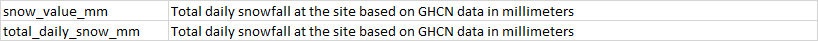 

Lets use total daily snow as it had a stronger correlation

Techniques so far have shown a need to seperate snowy days from rainy days. Lets first eliminate all dry days and then lets create two seperate data frames. One for rain and one for snow.

In [ ]:
dfprecip =df1.drop(df1[(df1['snow_value_mm'] ==0) & (df1['rain_value_mm'] ==0)].index)

In [ ]:
corr_mat = dfprecip.corr().stack().reset_index(name="correlation")
corr_mat[corr_mat['level_0']=='PR']

,level_0,level_1,correlation
17,PR,plant_age_months,-0.099984
18,PR,PR,1.000000
19,PR,snow_value_mm,-0.321688
20,PR,total_daily_snow_mm,-0.392604
21,PR,low_irradiation,-0.230185
22,PR,cumulative_snow_mm,-0.240624
23,PR,hurricane,-0.038139
24,PR,nearest_hurricane,0.081133
25,PR,rain_value_mm,-0.023687
26,PR,nearest_rain,-0.059664


In [ ]:
dfsnow = dfprecip[dfprecip.total_daily_snow_mm != 0]
dfsnow.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,749.000000,749.0,749.000000,749.000000,749.000000,749.000000,749.000000,749.0,749.000000,749.000000,749.000000,749.0,749.0,749.000000,749.000000,749.000000,749.0,749.0,749.000000,749.000000
mean,53.650200,0.0,0.506346,19.599863,43.614626,0.558077,934.701756,0.0,351.202937,4.593038,0.575434,0.0,0.0,0.001335,1.121495,1599.978638,0.0,0.0,1890.891856,0.806409
std,24.168038,0.0,0.315017,34.645019,49.288554,0.496947,920.029859,0.0,28.816986,6.923387,1.959820,0.0,0.0,0.036539,30.692932,993.027859,0.0,0.0,771.818020,0.395376
min,7.000000,0.0,0.001180,0.000000,0.171425,0.000000,1.079647,0.0,53.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,18.000000,0.000000
25%,36.000000,0.0,0.182457,1.647489,10.438515,0.000000,227.082510,0.0,354.000000,0.205618,0.000000,0.0,0.0,0.000000,0.000000,523.000000,0.0,0.0,2255.000000,1.000000
50%,40.000000,0.0,0.585629,6.260456,25.553266,1.000000,526.128039,0.0,354.000000,1.695491,0.000000,0.0,0.0,0.000000,0.000000,2420.000000,0.0,0.0,2255.000000,1.000000
75%,74.000000,0.0,0.795942,20.877853,57.379997,1.000000,1535.803549,0.0,354.000000,5.719361,0.000000,0.0,0.0,0.000000,0.000000,2420.000000,0.0,0.0,2255.000000,1.000000
max,104.000000,0.0,0.996015,263.616900,283.386294,1.000000,3586.570869,0.0,354.000000,39.122375,23.000000,0.0,0.0,1.000000,840.000000,2420.000000,0.0,0.0,2255.000000,1.000000


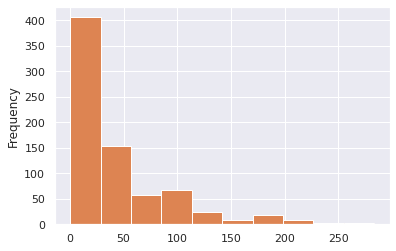

In [ ]:
dfsnow['total_daily_snow_mm'].plot(kind="hist")

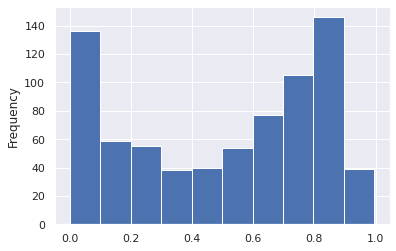

In [ ]:
dfsnow['PR'].plot(kind="hist")

In [ ]:
dfrain = dfprecip[dfprecip.rain_value_mm != 0]
dfrain.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,7665.000000,7665.0,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.0,7665.0,7665.0,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.0
mean,48.303457,0.0,0.719311,1.799508,3.731199,0.403392,147.333682,0.017091,296.432877,7.720033,0.0,0.0,0.0,0.005871,1.662361,1280.341683,0.003653,0.598956,1487.413829,1.0
std,21.872120,0.0,0.184541,12.214656,19.520139,0.490610,488.772624,0.129618,106.721850,11.831752,0.0,0.0,0.0,0.076401,41.512694,1034.999588,0.060333,11.669102,933.615817,0.0
min,1.000000,0.0,0.001180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,34.000000,0.0,0.691839,0.000000,0.000000,0.000000,0.000000,0.000000,291.000000,0.732744,0.0,0.0,0.0,0.000000,0.000000,185.000000,0.000000,0.000000,516.000000,1.0
50%,48.000000,0.0,0.767399,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,3.131512,0.0,0.0,0.0,0.000000,0.000000,975.000000,0.000000,0.000000,2255.000000,1.0
75%,59.000000,0.0,0.828419,0.000000,0.000000,1.000000,0.000000,0.000000,354.000000,9.865150,0.0,0.0,0.0,0.000000,0.000000,2420.000000,0.000000,0.000000,2255.000000,1.0
max,123.000000,0.0,0.999891,263.616900,283.386294,1.000000,3614.551523,1.000000,354.000000,185.644027,0.0,0.0,0.0,1.000000,1440.000000,2420.000000,1.000000,496.000000,2255.000000,1.0


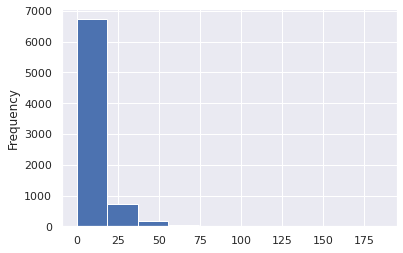

In [ ]:
dfrain['rain_value_mm'].plot(kind="hist")

There is still a lot of data in very little rain. "light rain" is defined as < 2mm.5/hr. http://www.int-res.com/abstracts/cr/v67/n1/p71-86/

So lets eliminate anything below 5mm (approx. two hours of light rain)

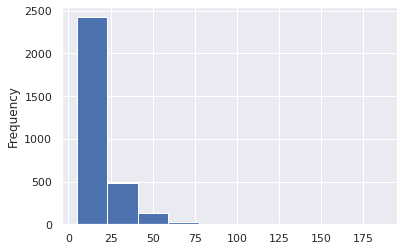

In [ ]:
dfrain = dfrain[dfrain.rain_value_mm > 5]
dfrain['rain_value_mm'].plot(kind="hist")

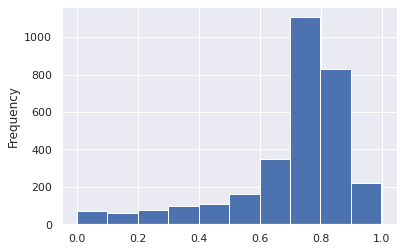

In [ ]:
dfrain['PR'].plot(kind="hist")

In [ ]:
dfrain.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,3084.000000,3084.0,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.0,3084.0,3084.0,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.0
mean,49.385214,0.0,0.705502,2.724820,4.174982,0.488003,138.473776,0.021077,288.537289,16.941973,0.0,0.0,0.0,0.004864,1.154994,1279.256161,0.003891,0.720169,1454.830415,1.0
std,22.868097,0.0,0.198315,17.246618,22.919243,0.499937,464.113756,0.143663,110.866821,14.240271,0.0,0.0,0.0,0.069583,33.857038,1027.659428,0.062267,14.394938,938.995995,0.0
min,3.000000,0.0,0.001180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000801,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,34.000000,0.0,0.666870,0.000000,0.000000,0.000000,0.000000,0.000000,257.000000,7.792470,0.0,0.0,0.0,0.000000,0.000000,211.750000,0.000000,0.000000,491.750000,1.0
50%,49.000000,0.0,0.761444,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,12.389533,0.0,0.0,0.0,0.000000,0.000000,961.000000,0.000000,0.000000,2255.000000,1.0
75%,60.000000,0.0,0.825413,0.000000,0.000000,1.000000,0.000000,0.000000,354.000000,21.039451,0.0,0.0,0.0,0.000000,0.000000,2420.000000,0.000000,0.000000,2255.000000,1.0
max,123.000000,0.0,0.999173,263.616900,283.386294,1.000000,3614.551523,1.000000,354.000000,185.644027,0.0,0.0,0.0,1.000000,1320.000000,2420.000000,1.000000,496.000000,2255.000000,1.0


# Data Dictionary

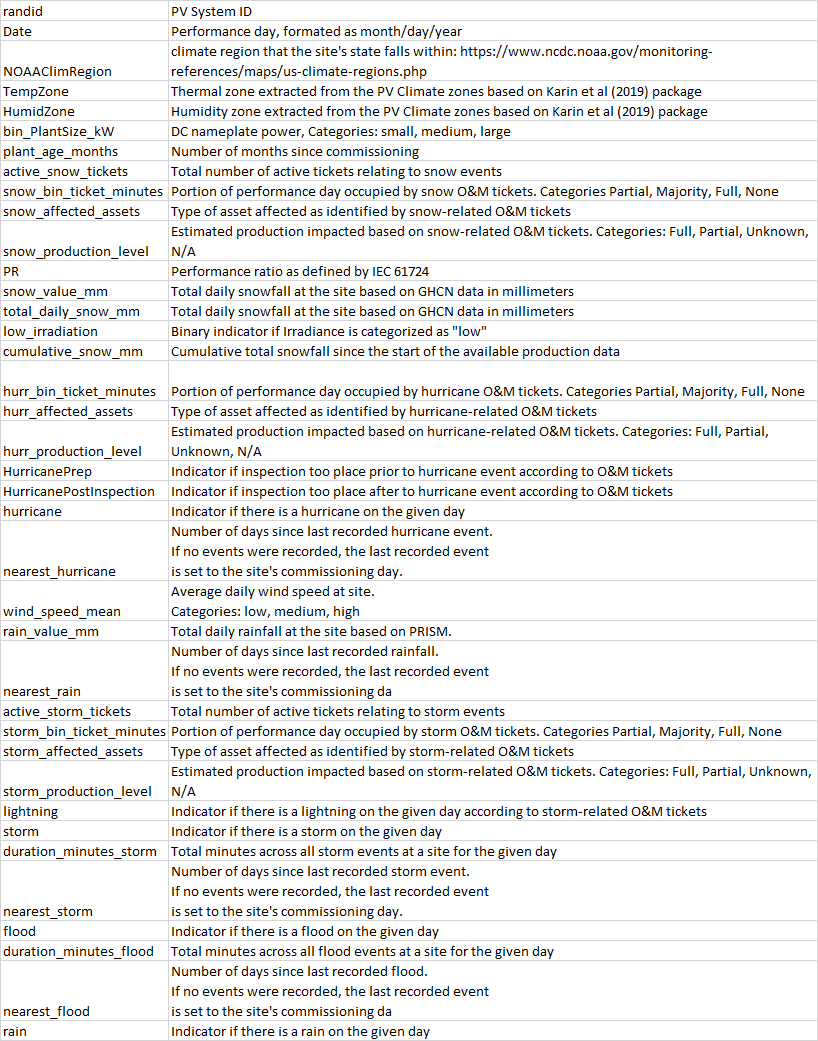

# **CLUSTERING**






## KMEANS (effectively abandoned)

In [ ]:
from sklearn.cluster import KMeans
x = df1[['snow_value_mm', 'rain_value_mm',]]
y = df1['PR']
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 ... 0 0 0]


array([[1.38658550e-01, 7.57895790e-01],
       [2.12607785e-01, 2.60684547e+01],
       [1.70846511e+02, 1.81272175e+01],
       [3.33066907e-16, 1.57826153e+02],
       [5.66343767e+01, 8.73305838e+00]])

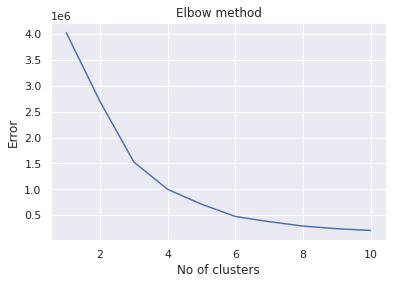

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 ... 0 0 0]


array([[  0.24281286,   0.9767581 ],
       [  0.43590352,  33.71950358],
       [108.70376619,  14.02852999]])

Text(0, 0.5, 'PR')

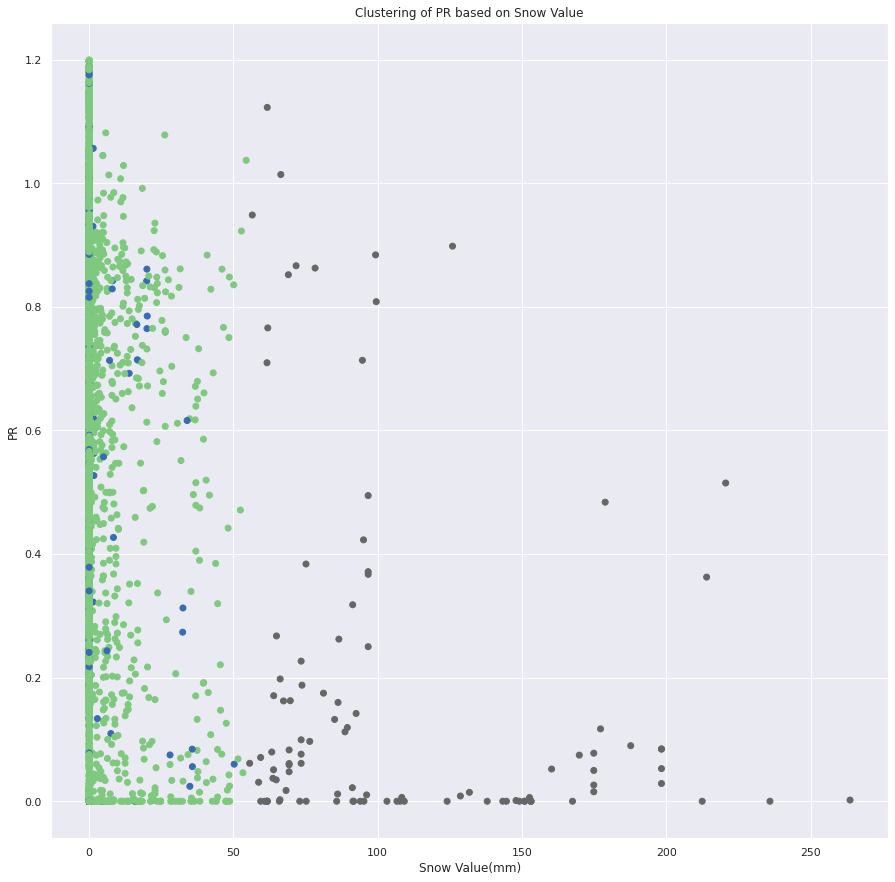

In [ ]:
plt.figure(figsize=(15, 15))
plt.savefig('pic.png', dpi=80)
plt.scatter(x['snow_value_mm'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of PR based on Snow Value')
plt.xlabel('Snow Value(mm)')
plt.ylabel('PR')

Text(0, 0.5, 'PR')

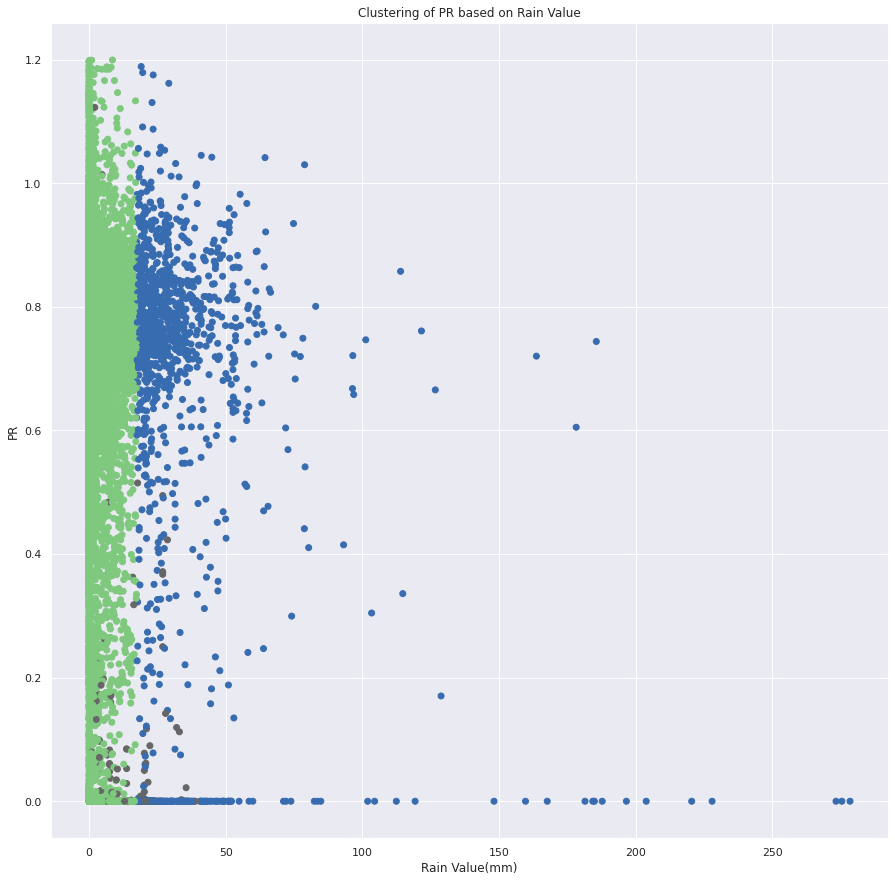

In [ ]:
plt.figure(figsize=(15, 15))
plt.savefig('pic.png', dpi=80)
plt.scatter(x['rain_value_mm'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of PR based on Rain Value')
plt.xlabel('Rain Value(mm)')
plt.ylabel('PR')

## KMEANS 2nd Attempt Eliminating the Data Without Precipitation (effectively abandonded)

In [ ]:
from sklearn.cluster import KMeans
x = dfprecip[['snow_value_mm', 'rain_value_mm']]
y = dfprecip['PR']
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 ... 1 1 0]


array([[2.11787860e-01, 1.98997737e+01],
       [6.04647892e-01, 2.87108243e+00],
       [1.78620431e+02, 1.55990802e+01],
       [5.32907052e-15, 5.45454742e+01],
       [5.46169348e+01, 8.15338147e+00]])

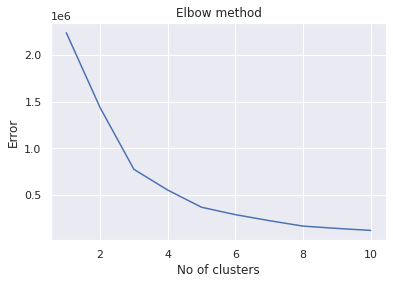

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 ... 0 0 1]


array([[  0.9592754 ,   4.10498579],
       [  0.48535852,  32.5026453 ],
       [106.94531283,  12.30919018]])

Text(0, 0.5, 'PR')

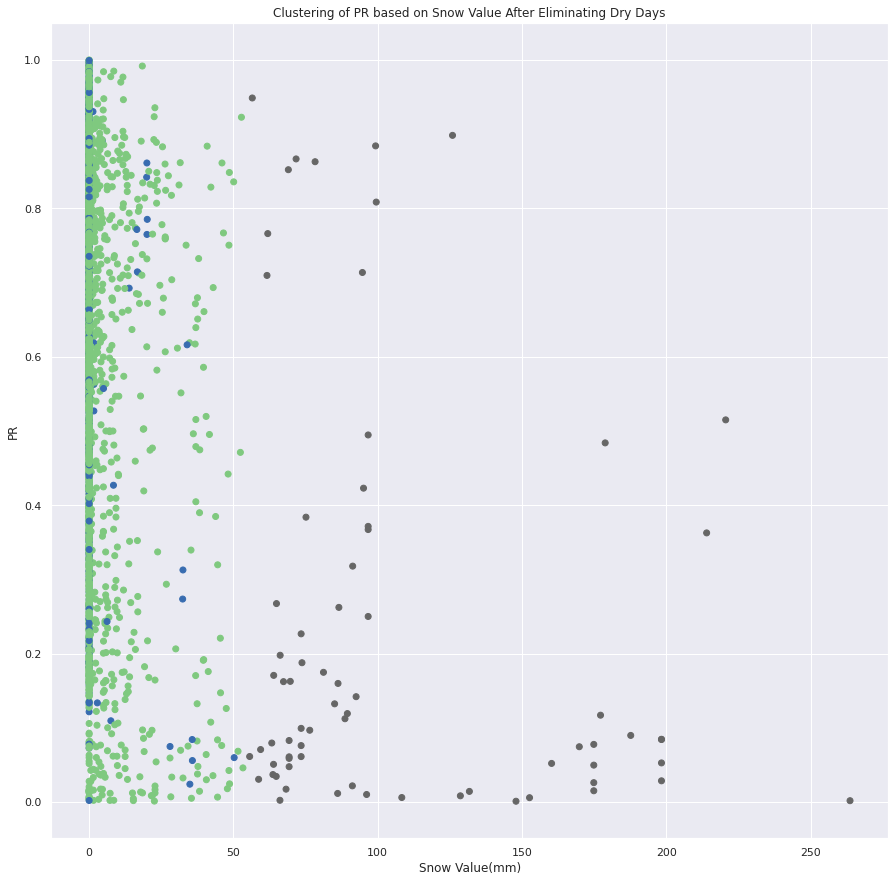

In [ ]:
plt.figure(figsize=(15, 15))
plt.savefig('pic.png', dpi=80)
plt.scatter(x['snow_value_mm'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of PR based on Snow Value After Eliminating Dry Days')
plt.xlabel('Snow Value(mm)')
plt.ylabel('PR')

Text(0, 0.5, 'PR')

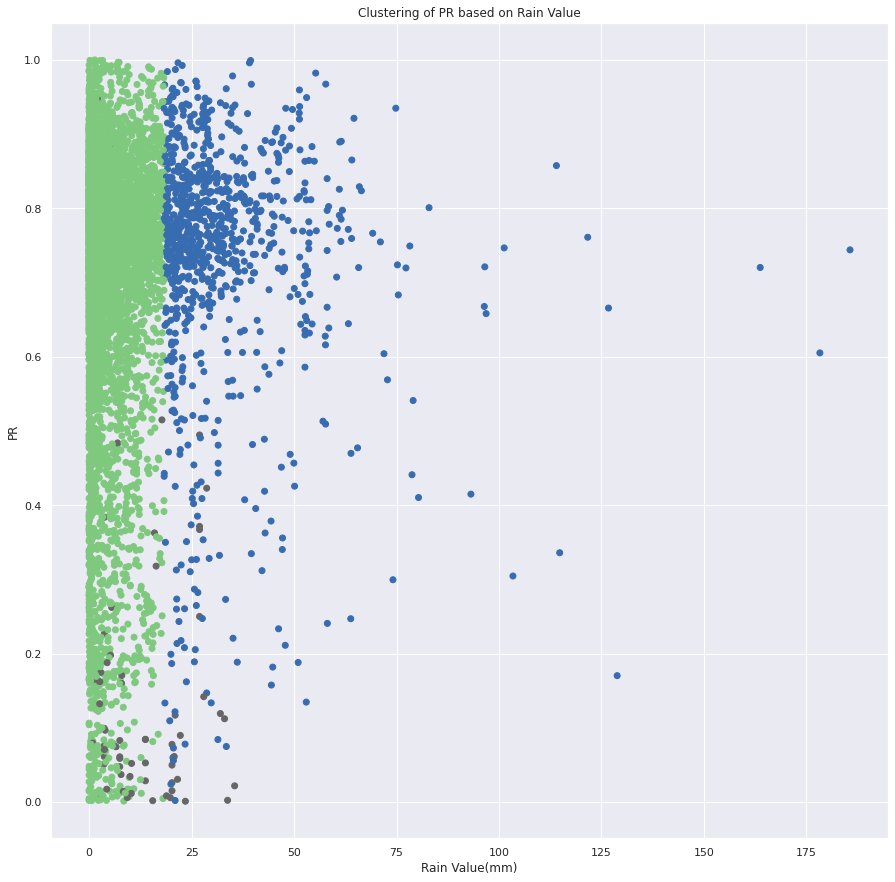

In [ ]:
plt.figure(figsize=(15, 15))
plt.savefig('pic.png', dpi=80)
plt.scatter(x['rain_value_mm'], y, c=y_kmeans3, cmap='Accent')
plt.title('Clustering of PR based on Rain Value')
plt.xlabel('Rain Value(mm)')
plt.ylabel('PR')

##KMEANS No Dry Days. Rain and Snow Seperate

Our clusters are not good. Likely because the days where both snow and rain was recorded.

In [ ]:
from sklearn.cluster import KMeans
x = dfrain[['rain_value_mm']]
y = dfrain['PR']
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 4 0 ... 1 0 4]


array([[  8.50799162],
       [ 53.91951044],
       [ 31.25643914],
       [122.94955076],
       [ 18.17776144]])

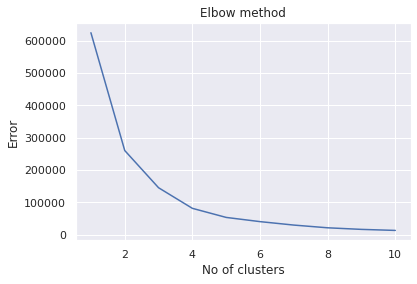

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)

kmeans2.cluster_centers_

[0 0 0 ... 1 0 0]


array([[12.13452738],
       [41.55151496]])

Text(0, 0.5, 'PR')

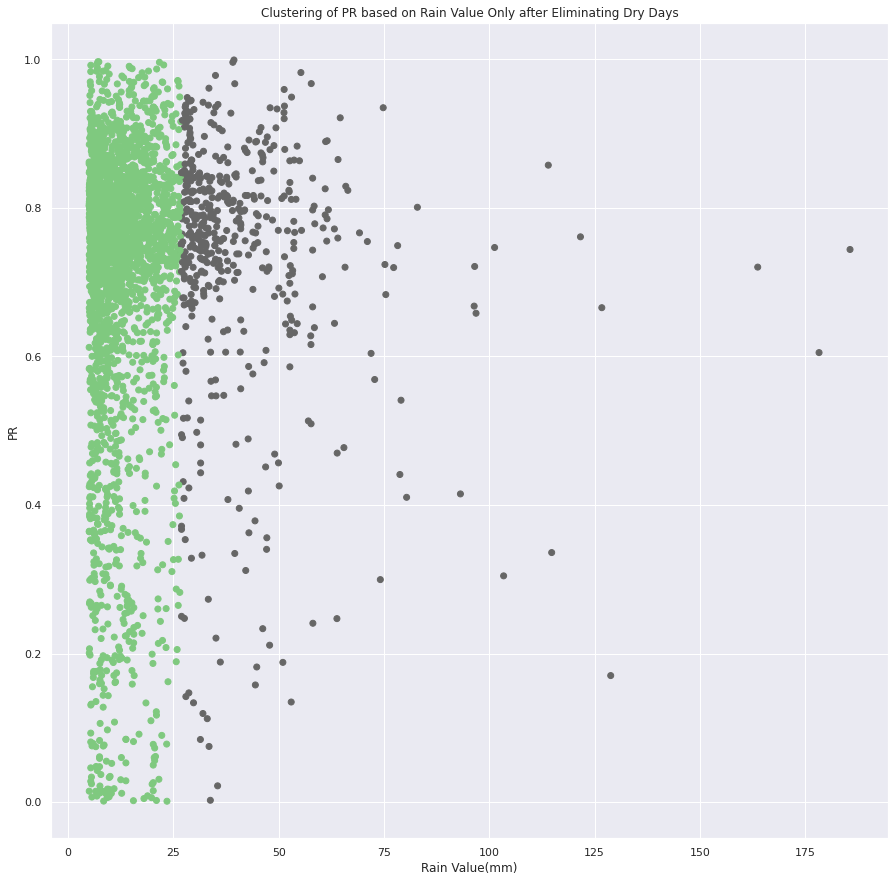

In [ ]:
plt.figure(figsize=(15, 15))
plt.savefig('pic.png', dpi=80)
plt.scatter(x['rain_value_mm'], y, c=y_kmeans2, cmap='Accent')
plt.title('Clustering of PR based on Rain Value Only after Eliminating Dry Days')
plt.xlabel('Rain Value(mm)')
plt.ylabel('PR')

In [ ]:
from sklearn.cluster import KMeans
x = dfsnow[['total_daily_snow_mm']]
y = dfsnow['PR']
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 1 1 0 0 4 4 4 4 3 4 4 4 4 4 4 4 4 4 0 2 1 2 2 4 2 1 4 2 2 3 3 0 3 4 4 3
 4 4 3 4 1 2 0 0 4 4 4 4 4 3 4 4 4 3 4 3 4 4 0 2 2 2 2 4 2 1 4 2 2 3 3 0 3
 3 4 0 0 4 4 4 4 4 3 4 4 4 3 4 3 4 4 0 2 2 2 2 4 2 1 4 2 2 3 3 0 3 3 4 0 0
 4 4 4 4 4 3 4 4 4 4 4 4 4 4 0 2 2 2 2 4 2 1 4 2 2 3 3 0 3 3 4 0 0 4 4 4 4
 4 3 4 4 4 4 3 4 4 0 2 2 2 2 4 2 1 4 2 2 3 3 0 4 3 4 3 3 4 4 4 4 4 4 4 4 3
 4 4 4 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 3 4 4 4 3 3 3 3 3 3 4 4 3 3 3 3 4
 4 1 3 3 4 4 2 2 3 1 4 1 1 1 3 1 3 1 4 2 3 2 1 3 3 1 3 4 3 1 3 1 3 1 3 1 1
 4 4 1 3 3 1 4 2 2 3 3 3 3 1 1 3 1 3 2 2 3 3 3 4 3 3 1 3 2 3 1 2 1 3 1 2 2
 0 0 1 2 3 1 1 1 1 1 1 3 3 3 1 1 3 3 4 4 4 4 4 3 4 4 4 4 3 3 4 4 4 1 3 3 2
 4 3 2 2 2 2 2 1 1 4 4 3 3 4 4 4 4 4 3 3 4 4 3 4 1 4 4 4 4 4 3 4 4 3 4 4 0
 0 4 4 3 4 3 4 4 4 3 3 3 4 3 0 1 1 2 2 4 1 1 4 2 2 3 3 4 1 4 4 3 4 4 3 1 3
 4 4 4 3 2 4 4 1 1 1 1 3 3 1 1 3 3 0 4 4 1 1 4 4 3 3 3 2 2 3 4 3 4 4 2 3 3
 4 3 1 3 3 4 4 1 3 2 0 4 3 4 4 3 4 2 4 3 4 4 3 4 2 3 3 1 4 3 4 4 3 4 1 2 3
 3 3 3 1 1 3 1 1 3 2 3 3 

array([[202.14051982],
       [ 60.21837349],
       [109.12674315],
       [ 29.87432038],
       [  8.45497252]])

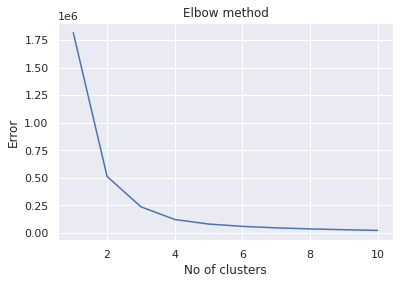

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)

kmeans2.cluster_centers_


[0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 

array([[132.68068456],
       [ 24.03169788]])

Text(0, 0.5, 'PR')

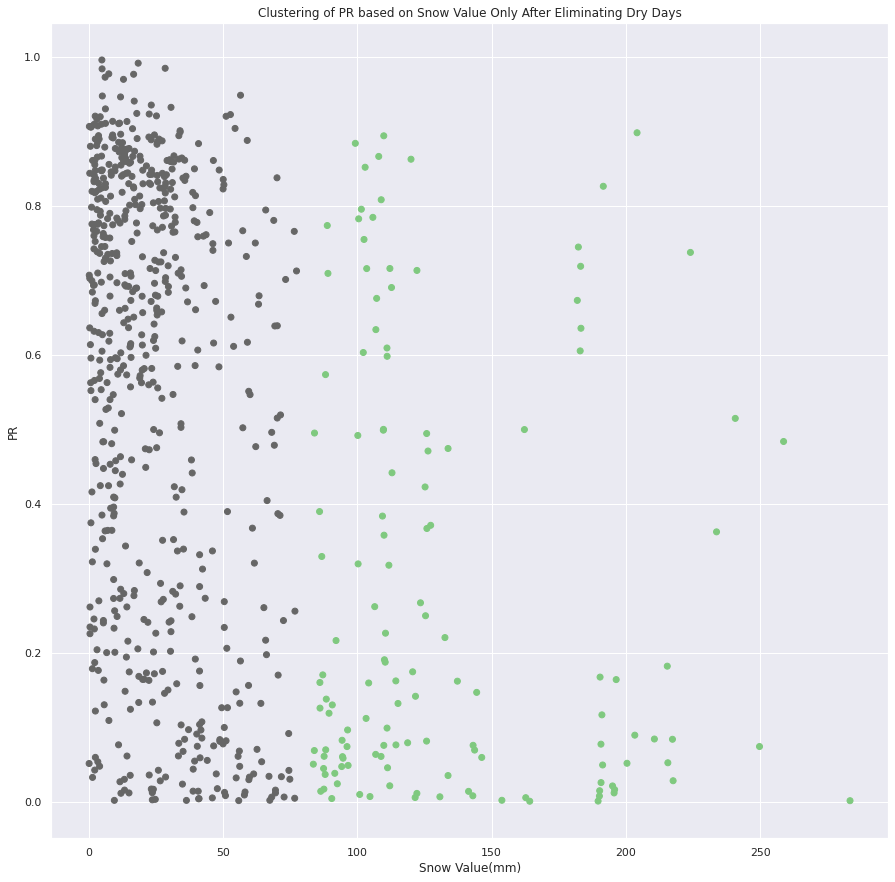

In [ ]:
plt.figure(figsize=(15, 15))
plt.savefig('pic.png', dpi=80)
plt.scatter(x['total_daily_snow_mm'], y, c=y_kmeans2, cmap='Accent')
plt.title('Clustering of PR based on Snow Value Only After Eliminating Dry Days')
plt.xlabel('Snow Value(mm)')
plt.ylabel('PR')

Our clusters show that food cut offs of precipitation level exist at

20 mm of rain

75 mm of snow

## Hierarchal

###Gower Distance (effectively abandoned)

In [ ]:
!pip install gower
# where I got the idea for Hierarchal with non numerical data https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad


  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=6a80f8b2340e48c53a35f58325a0198a8967f54f450a801e99d46297d0219775
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [ ]:
df2 = df1[['plant_age_months','PR','snow_value_mm','low_irradiation','hurricane','rain_value_mm','lightning','storm','flood','rain']]
df2

,plant_age_months,PR,snow_value_mm,low_irradiation,hurricane,rain_value_mm,lightning,storm,flood,rain
0,19.0,0.825922,0.0,0,0.0,0.0,0,0.0,0.0,0.0
1,19.0,0.788456,0.0,0,0.0,0.0,0,0.0,0.0,0.0
2,19.0,0.773524,0.0,0,0.0,0.0,0,0.0,0.0,0.0
3,19.0,0.798637,0.0,0,0.0,0.0,0,0.0,0.0,0.0
4,19.0,0.787212,0.0,0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
51499,31.0,0.721850,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51500,31.0,0.727255,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51501,31.0,0.717232,0.0,0,0.0,0.0,0,0.0,0.0,0.0
51502,31.0,0.702711,0.0,0,0.0,0.0,0,0.0,0.0,0.0


In [ ]:
## kernel keeps crashing
import gower
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
dm = gower.gower_matrix(df2)
Zd = linkage(dm)                           #source https://www.thinkdatascience.com/post/2019-12-16-introducing-python-package-gower/
cld = fcluster(Zd, 3, criterion='maxclust')
cld


plot the # of clusters and the number of data points in the cluster


### Trying again with the same variables as Kmeans

In [ ]:
df3= dfrain[['PR','rain_value_mm']]
df3

,PR,rain_value_mm
16,0.703372,2.456525
31,0.717031,0.005820
41,0.696349,0.009131
109,0.738495,0.082436
195,0.748078,0.017805
...,...,...
51484,0.784588,3.972344
51485,0.723623,0.398666
51486,0.726830,1.144970
51490,0.711503,1.383531


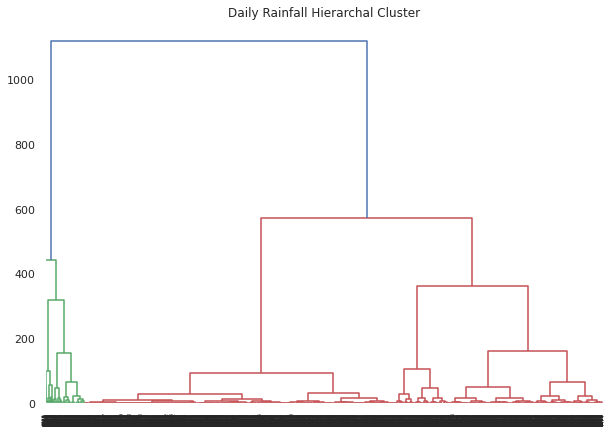

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Daily Rainfall Hierarchal Cluster")
dend =shc.dendrogram(shc.linkage(df3, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df3)

array([0, 0, 0, ..., 0, 0, 0])

Text(0, 0.5, 'PR')

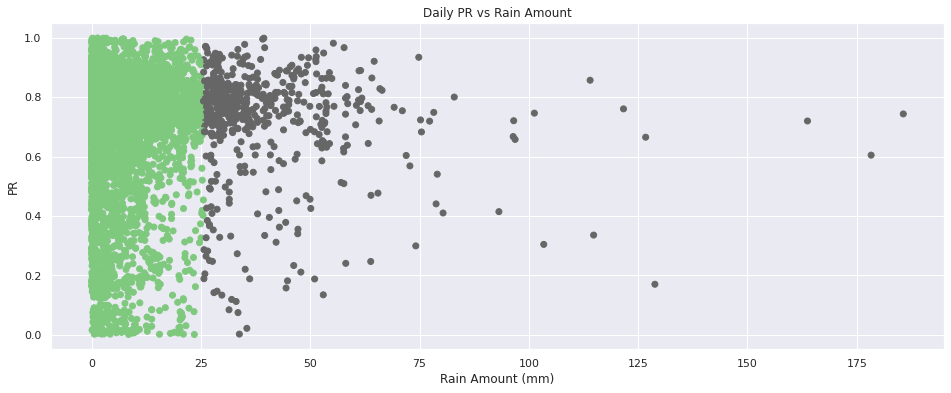

In [ ]:
plt.figure(figsize=(16,6)) 
plt.scatter(df3['rain_value_mm'], df3['PR'], c=cluster.labels_, cmap='Accent')
plt.title('Daily PR vs Rain Amount')
plt.xlabel('Rain Amount (mm)')
plt.ylabel('PR')

In [ ]:
df4= dfsnow[['PR','total_daily_snow_mm']]
df4

,PR,total_daily_snow_mm
3008,0.059961,146.307754
3009,0.584168,48.490937
3392,0.791215,45.066276
4679,0.117109,191.035689
4680,0.673343,181.877708
...,...,...
49864,0.176753,3.585812
49891,0.733466,10.497608
49893,0.458143,10.074406
49894,0.580003,11.843980


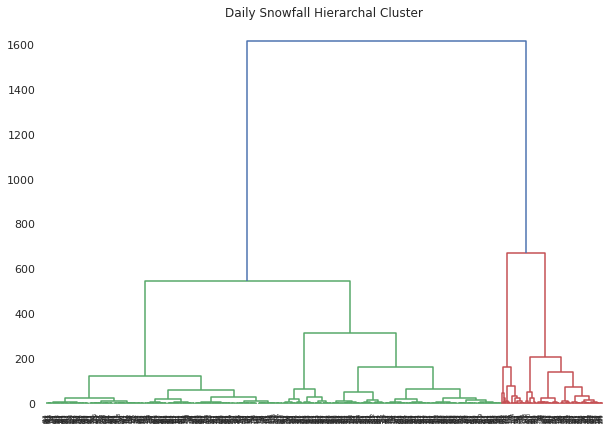

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Daily Snowfall Hierarchal Cluster")
dend =shc.dendrogram(shc.linkage(df4, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df4)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

Text(0, 0.5, 'PR')

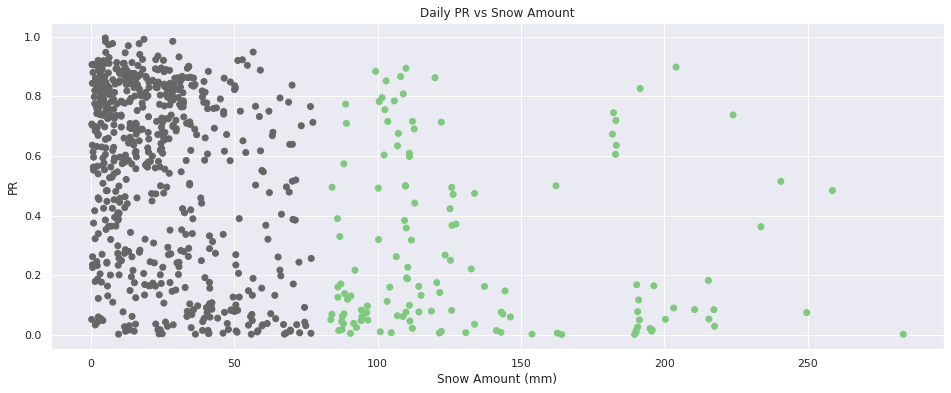

In [ ]:
plt.figure(figsize=(16,6)) 
plt.scatter(df4['total_daily_snow_mm'], df4['PR'], c=cluster.labels_, cmap='Accent')
plt.title('Daily PR vs Snow Amount')
plt.xlabel('Snow Amount (mm)')
plt.ylabel('PR')

Similar results as KMEANs however 25 mm for raind and 75 mm for snow

## Self Organizing Maps

In [ ]:
!pip install sklearn-som
from sklearn_som.som import SOM

In [ ]:
df5=dfrain[['PR','rain_value_mm',]]
df5=df5.values
df5

array([[7.03372380e-01, 2.45652461e+00],
       [7.17030705e-01, 5.82027200e-03],
       [6.96349351e-01, 9.13072000e-03],
       ...,
       [7.26829510e-01, 1.14496992e+00],
       [7.11503428e-01, 1.38353123e+00],
       [7.35336799e-01, 2.10464006e+01]])

In [ ]:
som = SOM(m=2, n=1, dim=2)
som.fit(df5)

In [ ]:
predictions = som.predict(df5)

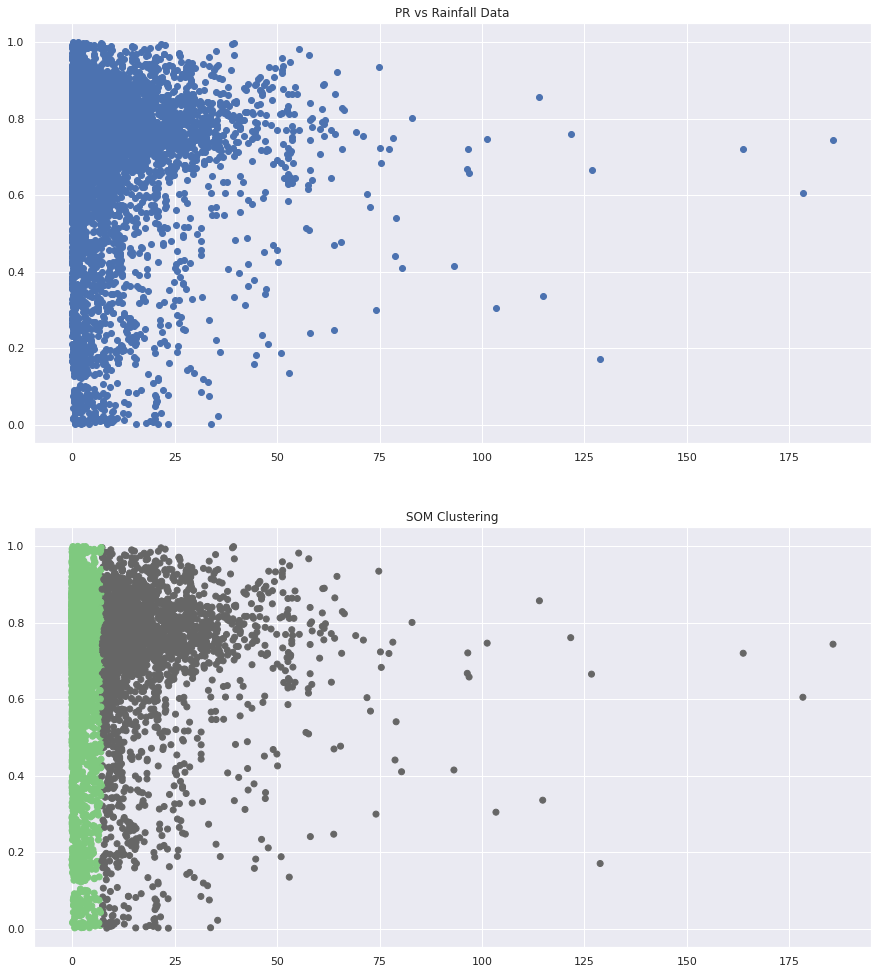

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,17))
x = df5[:,1]
y = df5[:,0]


ax[0].scatter(x, y, cmap='Accent')
ax[0].title.set_text('PR vs Rainfall Data')
ax[1].scatter(x, y, c=predictions, cmap='Accent')
ax[1].title.set_text('SOM Clustering')
plt.savefig('df5.png')

In [ ]:
df6=dfsnow[['PR','total_daily_snow_mm',]]
df6=df6.values
df6

array([[5.99607480e-02, 1.46307754e+02],
       [5.84168123e-01, 4.84909367e+01],
       [7.91215332e-01, 4.50662756e+01],
       ...,
       [4.58143315e-01, 1.00744060e+01],
       [5.80003051e-01, 1.18439805e+01],
       [8.61483783e-01, 3.57342541e+01]])

In [ ]:
som = SOM(m=2, n=1, dim=2)
som.fit(df6)
predictions = som.predict(df6)

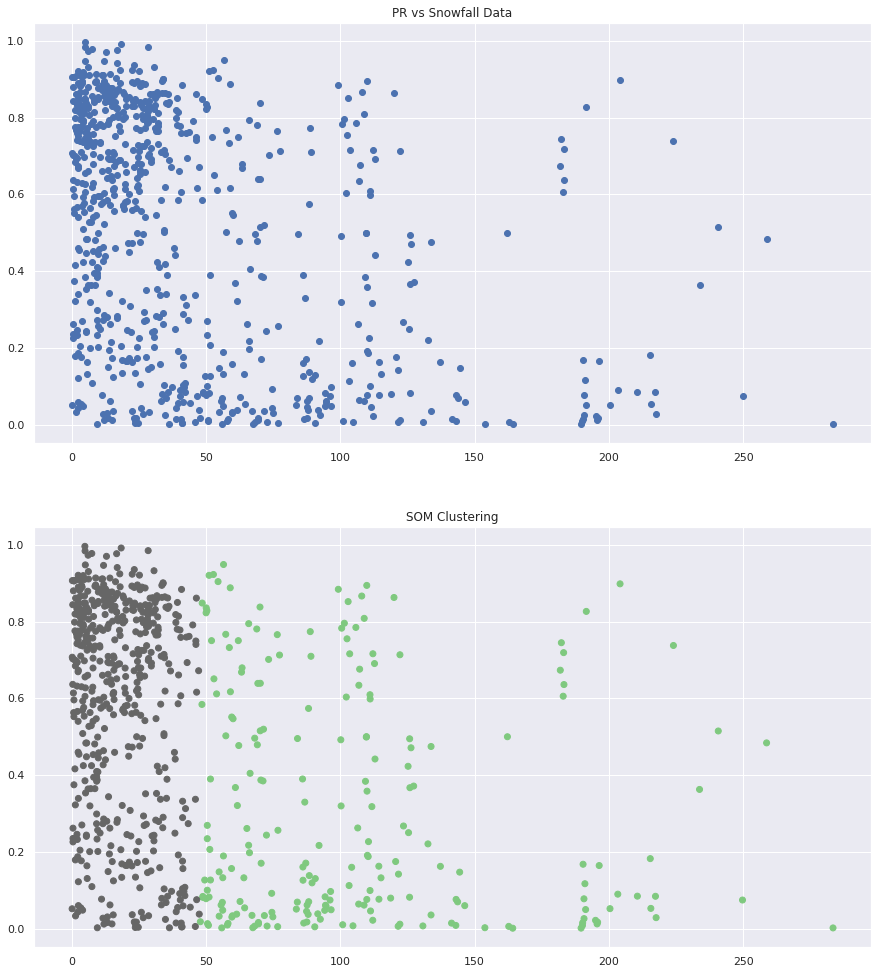

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,17))
x = df6[:,1]
y = df6[:,0]


ax[0].scatter(x, y, cmap='Accent')
ax[0].title.set_text('PR vs Snowfall Data')
ax[1].scatter(x, y, c=predictions, cmap='Accent')
ax[1].title.set_text('SOM Clustering')
plt.savefig('df6.png')

Similar results with 12.5 mm cut off for rain and 45 mm snow

# CLASSIFICATION

## KNN

In [ ]:
dfprecip.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,7810.000000,7810.0,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.0,7810.0,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000
mean,48.306914,0.0,0.717408,1.879680,4.182760,0.407554,161.174041,0.016773,297.463124,7.576704,0.055186,0.0,0.0,0.005762,1.631498,1285.771703,0.003585,0.587836,1496.878745,0.981434
std,21.924758,0.0,0.186930,12.177167,19.941319,0.491411,511.123446,0.128429,106.045773,11.767628,0.629779,0.0,0.0,0.075693,41.126090,1034.964087,0.059772,11.560540,931.940237,0.134995
min,1.000000,0.0,0.001180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.0,0.689510,0.000000,0.000000,0.000000,0.000000,0.000000,293.000000,0.663134,0.000000,0.0,0.0,0.000000,0.000000,188.000000,0.000000,0.000000,526.000000,1.000000
50%,48.000000,0.0,0.767106,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,3.009906,0.000000,0.0,0.0,0.000000,0.000000,983.000000,0.000000,0.000000,2255.000000,1.000000
75%,59.000000,0.0,0.828722,0.000000,0.000000,1.000000,0.000000,0.000000,354.000000,9.685827,0.000000,0.0,0.0,0.000000,0.000000,2420.000000,0.000000,0.000000,2255.000000,1.000000
max,123.000000,0.0,0.999891,263.616900,283.386294,1.000000,3614.551523,1.000000,354.000000,185.644027,23.000000,0.0,0.0,1.000000,1440.000000,2420.000000,1.000000,496.000000,2255.000000,1.000000


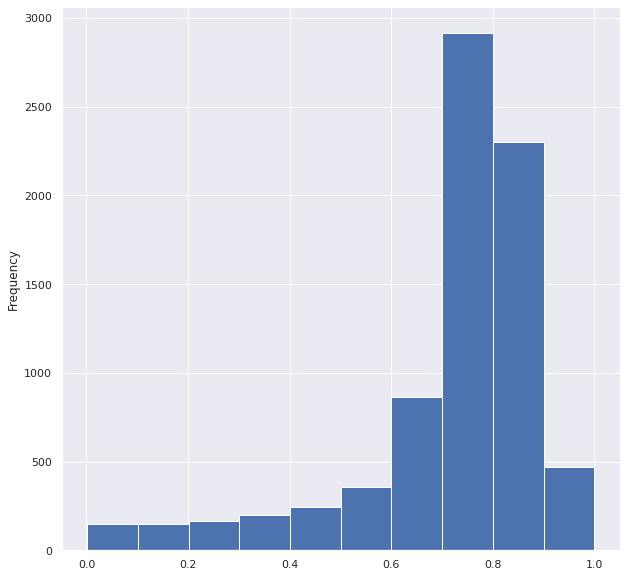

In [ ]:
plt.figure(figsize=(10,10))
dfprecip['PR'].plot(kind="hist")

In [ ]:
dfcat = dfprecip

In [ ]:
category = pd.cut(dfprecip['PR'],bins=[0,0.6,0.8,1],labels=['Low','Medium','High'])  
dfcat.insert(4,'PR Level',category)

In [ ]:
dfcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 16 to 51496
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   randid                    7810 non-null   object        
 1   Date                      7810 non-null   datetime64[ns]
 2   NOAAClimRegion            7810 non-null   object        
 3   TempZone                  7810 non-null   object        
 4   PR Level                  7810 non-null   category      
 5   HumidZone                 7810 non-null   object        
 6   bin_PlantSize_kW          7810 non-null   object        
 7   plant_age_months          7810 non-null   float64       
 8   active_snow_tickets       7810 non-null   int64         
 9   snow_bin_ticket_minutes   7810 non-null   object        
 10  snow_affected_assets      7810 non-null   object        
 11  snow_production_level     7810 non-null   object        
 12  PR                

In [ ]:
x = dfcat[['low_irradiation','total_daily_snow_mm','rain_value_mm']]   #addition of these variables made outcomes worse: 'active_snow_tickets','hurricane','storm_active_tickets','storm','flood','rain'
y = dfcat[['PR Level']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[255  46 266]
 [ 85  82  69]
 [282  56 421]]
              precision    recall  f1-score   support

        High       0.41      0.45      0.43       567
         Low       0.45      0.35      0.39       236
      Medium       0.56      0.55      0.56       759

    accuracy                           0.49      1562
   macro avg       0.47      0.45      0.46      1562
weighted avg       0.49      0.49      0.48      1562



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


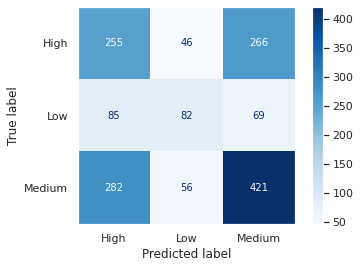

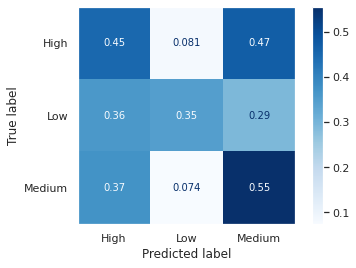

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()


In [ ]:
dfcatsnow = dfcat[dfcat.total_daily_snow_mm != 0]
dfcatsnow.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,749.000000,749.0,749.000000,749.000000,749.000000,749.000000,749.000000,749.0,749.000000,749.000000,749.000000,749.0,749.0,749.000000,749.000000,749.000000,749.0,749.0,749.000000,749.000000
mean,53.650200,0.0,0.506346,19.599863,43.614626,0.558077,934.701756,0.0,351.202937,4.593038,0.575434,0.0,0.0,0.001335,1.121495,1599.978638,0.0,0.0,1890.891856,0.806409
std,24.168038,0.0,0.315017,34.645019,49.288554,0.496947,920.029859,0.0,28.816986,6.923387,1.959820,0.0,0.0,0.036539,30.692932,993.027859,0.0,0.0,771.818020,0.395376
min,7.000000,0.0,0.001180,0.000000,0.171425,0.000000,1.079647,0.0,53.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,18.000000,0.000000
25%,36.000000,0.0,0.182457,1.647489,10.438515,0.000000,227.082510,0.0,354.000000,0.205618,0.000000,0.0,0.0,0.000000,0.000000,523.000000,0.0,0.0,2255.000000,1.000000
50%,40.000000,0.0,0.585629,6.260456,25.553266,1.000000,526.128039,0.0,354.000000,1.695491,0.000000,0.0,0.0,0.000000,0.000000,2420.000000,0.0,0.0,2255.000000,1.000000
75%,74.000000,0.0,0.795942,20.877853,57.379997,1.000000,1535.803549,0.0,354.000000,5.719361,0.000000,0.0,0.0,0.000000,0.000000,2420.000000,0.0,0.0,2255.000000,1.000000
max,104.000000,0.0,0.996015,263.616900,283.386294,1.000000,3586.570869,0.0,354.000000,39.122375,23.000000,0.0,0.0,1.000000,840.000000,2420.000000,0.0,0.0,2255.000000,1.000000


In [ ]:
x = dfcatsnow[['low_irradiation','total_daily_snow_mm',]]   #addition of these variables made outcomes worse: 'active_snow_tickets','hurricane','storm_active_tickets','storm','flood','rain'
y = dfcatsnow[['PR Level']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16 15  8]
 [16 55  3]
 [18 12  7]]
              precision    recall  f1-score   support

        High       0.32      0.41      0.36        39
         Low       0.67      0.74      0.71        74
      Medium       0.39      0.19      0.25        37

    accuracy                           0.52       150
   macro avg       0.46      0.45      0.44       150
weighted avg       0.51      0.52      0.50       150



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


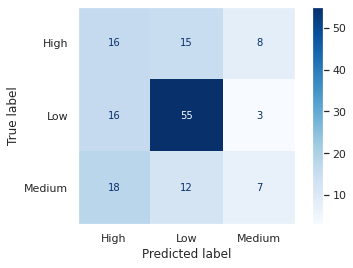

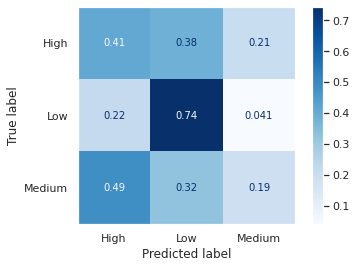

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()


In [ ]:
dfcatrain = dfcat[dfcat.rain_value_mm != 0]
dfcatrain.describe()

,plant_age_months,active_snow_tickets,PR,snow_value_mm,total_daily_snow_mm,low_irradiation,cumulative_snow_mm,hurricane,nearest_hurricane,rain_value_mm,nearest_rain,storm_active_tickets,lightning,storm,duration_minutes_storm,nearest_storm,flood,duration_minutes_flood,nearest_flood,rain
count,7665.000000,7665.0,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.0,7665.0,7665.0,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.000000,7665.0
mean,48.303457,0.0,0.719311,1.799508,3.731199,0.403392,147.333682,0.017091,296.432877,7.720033,0.0,0.0,0.0,0.005871,1.662361,1280.341683,0.003653,0.598956,1487.413829,1.0
std,21.872120,0.0,0.184541,12.214656,19.520139,0.490610,488.772624,0.129618,106.721850,11.831752,0.0,0.0,0.0,0.076401,41.512694,1034.999588,0.060333,11.669102,933.615817,0.0
min,1.000000,0.0,0.001180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,34.000000,0.0,0.691839,0.000000,0.000000,0.000000,0.000000,0.000000,291.000000,0.732744,0.0,0.0,0.0,0.000000,0.000000,185.000000,0.000000,0.000000,516.000000,1.0
50%,48.000000,0.0,0.767399,0.000000,0.000000,0.000000,0.000000,0.000000,354.000000,3.131512,0.0,0.0,0.0,0.000000,0.000000,975.000000,0.000000,0.000000,2255.000000,1.0
75%,59.000000,0.0,0.828419,0.000000,0.000000,1.000000,0.000000,0.000000,354.000000,9.865150,0.0,0.0,0.0,0.000000,0.000000,2420.000000,0.000000,0.000000,2255.000000,1.0
max,123.000000,0.0,0.999891,263.616900,283.386294,1.000000,3614.551523,1.000000,354.000000,185.644027,0.0,0.0,0.0,1.000000,1440.000000,2420.000000,1.000000,496.000000,2255.000000,1.0


In [ ]:
x = dfcatrain[['low_irradiation','rain_value_mm']]   #addition of these variables made outcomes worse: 'active_snow_tickets','hurricane','storm_active_tickets','storm','flood','rain'
y = dfcatrain[['PR Level']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[250  38 231]
 [ 96  54  74]
 [320  52 418]]
              precision    recall  f1-score   support

        High       0.38      0.48      0.42       519
         Low       0.38      0.24      0.29       224
      Medium       0.58      0.53      0.55       790

    accuracy                           0.47      1533
   macro avg       0.44      0.42      0.42      1533
weighted avg       0.48      0.47      0.47      1533



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


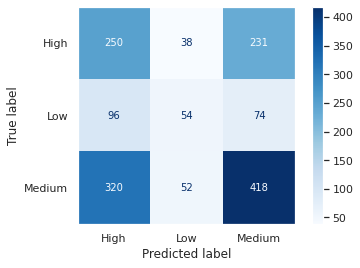

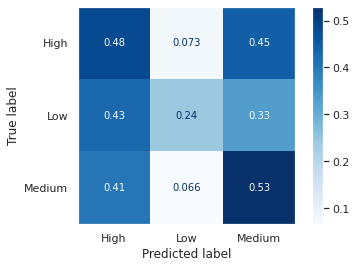

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()


## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3114  441   71]
 [1406  457   81]
 [ 233  162   89]]
              precision    recall  f1-score   support

     Average       0.66      0.86      0.74      3626
        High       0.43      0.24      0.30      1944
        Poor       0.37      0.18      0.25       484

    accuracy                           0.60      6054
   macro avg       0.49      0.43      0.43      6054
weighted avg       0.56      0.60      0.56      6054



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


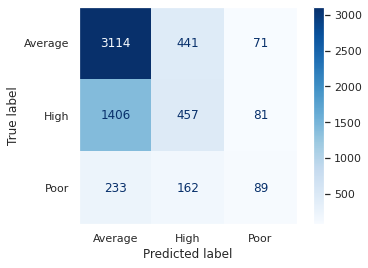

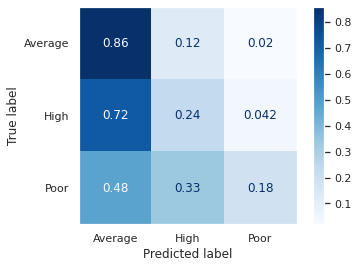

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()

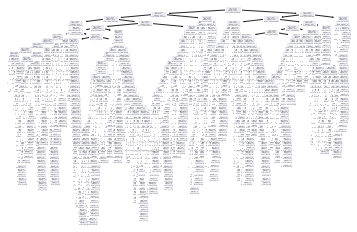

In [ ]:
from sklearn import tree
tree.plot_tree(classifier) 
plt.show()

## Multi Layered Perceptron

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 50, 100))
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3332  323   23]
 [1468  398   15]
 [ 247  184   64]]
              precision    recall  f1-score   support

     Average       0.66      0.91      0.76      3678
        High       0.44      0.21      0.29      1881
        Poor       0.63      0.13      0.21       495

    accuracy                           0.63      6054
   macro avg       0.58      0.42      0.42      6054
weighted avg       0.59      0.63      0.57      6054



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


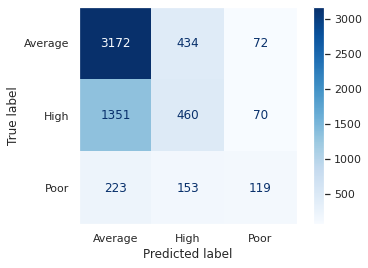

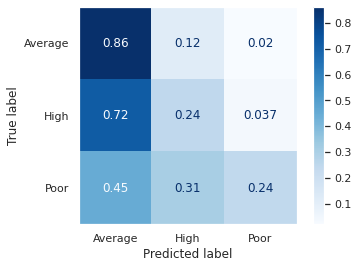

In [ ]:
#Plotting the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues)  
plt.grid(None)
# Plot normalized confusion matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues,normalize='true') 
plt.grid(None)
plt.show()

# Regression

## Linear

In [ ]:
dfregression = dfprecip[['PR','low_irradiation','total_daily_snow_mm','rain_value_mm']]
dfregression

,PR,low_irradiation,total_daily_snow_mm,rain_value_mm
16,0.703372,0,0.0,2.456525
31,0.717031,0,0.0,0.005820
41,0.696349,0,0.0,0.009131
109,0.738495,0,0.0,0.082436
195,0.748078,0,0.0,0.017805
...,...,...,...,...
51484,0.784588,0,0.0,3.972344
51485,0.723623,0,0.0,0.398666
51486,0.726830,0,0.0,1.144970
51490,0.711503,0,0.0,1.383531


In [77]:
X = dfregression[['low_irradiation','total_daily_snow_mm','rain_value_mm']]  
y = dfregression[['PR']]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [72]:
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1,1)

#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_X = sc_X.fit_transform(X_train)
scaled_y = sc_y.fit_transform(y_train)
scaled_X_test = sc_X.fit_transform(X_test)

In [74]:
y_pred = regressor.predict(scaled_X_test)

In [76]:
y_pred = y_pred.reshape(-1,1)
y_pred

array([[ 0.25852509],
       [-0.17785279],
       [-0.18563396],
       ...,
       [-0.19879076],
       [ 0.25658243],
       [ 0.2517631 ]])

In [79]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#reshape
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1,1)

#Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()

scaled_X = sc_X.fit_transform(X_train)
scaled_y = sc_y.fit_transform(y_train)
scaled_X_test = sc_X.fit_transform(X_test)

#Using the Linear Regression Model to predict the output
regressor = LinearRegression()
regressor.fit(scaled_X,scaled_y.ravel())
y_pred = regressor.predict(scaled_X_test)
y_pred = y_pred.reshape(-1,1)
y_pred=sc_y.inverse_transform(y_pred)
#Saving the predicted output in a dataframe
y_pred=pd.DataFrame(y_pred)
#Saving the actual output in a dataframe
y_test=pd.DataFrame(y_test)
#Calculating the R squared and Mean Squared Error Values
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
print(test_set_rmse)
print(test_set_r2)

0.16358747005031363
0.2279395360031149


In [80]:
#Diagnostic Plot showing how Regression line fits the data
plt.figure(figsize=(10,10))
plt.scatter(y[0], y_pred[0], c='red')

p1 = max(max(y_pred[0]), max(y[0]))
p2 = min(min(y_pred[0]), min(y[0]))
plt.plot([p1, p2], [p1, p2], 'b-', linewidth=4)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

KeyError: ignored

<Figure size 720x720 with 0 Axes>